# ---------------------------------------------------------------------------------------------------------
# Librerías
# ---------------------------------------------------------------------------------------------------------

In [1]:
import urllib.request
import os
import zipfile

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


import numpy as np

C:\Users\Saul\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Ubicación de imágenes de modelo y de test.

In [2]:
#Directorio base
script_dir = os.path.dirname('__file__')
rel_path = "Fotos_Proyecto_Detección_de_Bajas"
base_dir = os.path.join(script_dir, rel_path)

train_dir = os.path.join(base_dir, 'Entrenamiento')
validation_dir = os.path.join(base_dir, 'Validacion')

# Directorio con las fotos de gallinas clasificadas
train_alive_dir = os.path.join(train_dir, 'Gallinas_vivas')
train_dead_dir = os.path.join(train_dir, 'Gallinas_muertas')

# Directorio con las imágenes de modelo
validation_alive_dir = os.path.join(validation_dir, 'Gallinas_vivas')
validation_dead_dir = os.path.join(validation_dir, 'Gallinas_muertas')

### Ruta para guardar el modelo

In [3]:
model_path = 'Modelo_guardado'
model_dir = os.path.dirname(model_path)

# ---------------------------------------------------------------------------------------------------------
# PREPROCESAMIENTO DE LOS DATOS
# ---------------------------------------------------------------------------------------------------------

### Versión final

In [4]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.Conv2D(filtros, tamaño_kernel, activacion, input_shape)
    # input_size es la forma deseada de la imagen (150x150) con 3 bytes de color
    # Bloque de convolución 1
    tf.keras.layers.Conv2D(80, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Bloque de convolución 2
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    
    # Bloque de convolución 3
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    #Dropout
    tf.keras.layers.Dropout(0.25),
    
    # "Aplana" los resultados para pasárselos a una DNN (Deep neural network)
    tf.keras.layers.Flatten(), 
    
    # Capas fully connected
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    
    # Neurona de salida que devuelve dos valores: 0 para gallinas muertas y 1 para gallinas vivas.
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [5]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [6]:
# DATA AUGMENTATION: ROTACIÓN, BRILLO, VOLTEO, REESCALADO
train_datagen = ImageDataGenerator(rotation_range=90, 
                                   brightness_range=(0.2, 0.8), 
                                   horizontal_flip=True, 
                                   vertical_flip=True, 
                                   rescale = 1.0/255.)

test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# ------------------------------------------------------------------------
# Entrenamiento de las imágenes en lotes de 5 utilizando "train_datagen"
# ------------------------------------------------------------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=5,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

# ------------------------------------------------------------------------
# Validación de las imágenes en lotes de 5 utilizando "test_datagen"
# ------------------------------------------------------------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=5,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 161 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


## Entrenamiento

In [7]:
history = model.fit(train_generator,validation_data=validation_generator,epochs=100,verbose=2)
model.save(model_path)

Epoch 1/100
33/33 - 59s - loss: 0.7395 - accuracy: 0.7143 - val_loss: 0.6844 - val_accuracy: 0.7286 - 59s/epoch - 2s/step
Epoch 2/100
33/33 - 58s - loss: 0.6209 - accuracy: 0.7391 - val_loss: 0.7915 - val_accuracy: 0.7286 - 58s/epoch - 2s/step
Epoch 3/100
33/33 - 57s - loss: 0.6484 - accuracy: 0.7391 - val_loss: 0.5952 - val_accuracy: 0.7286 - 57s/epoch - 2s/step
Epoch 4/100
33/33 - 60s - loss: 0.6096 - accuracy: 0.7391 - val_loss: 0.6043 - val_accuracy: 0.7286 - 60s/epoch - 2s/step
Epoch 5/100
33/33 - 57s - loss: 0.6696 - accuracy: 0.7391 - val_loss: 0.6052 - val_accuracy: 0.7286 - 57s/epoch - 2s/step
Epoch 6/100
33/33 - 57s - loss: 0.6163 - accuracy: 0.7391 - val_loss: 0.5983 - val_accuracy: 0.7286 - 57s/epoch - 2s/step
Epoch 7/100
33/33 - 57s - loss: 0.6102 - accuracy: 0.7391 - val_loss: 0.5859 - val_accuracy: 0.7286 - 57s/epoch - 2s/step
Epoch 8/100
33/33 - 56s - loss: 0.5862 - accuracy: 0.7391 - val_loss: 0.5930 - val_accuracy: 0.7286 - 56s/epoch - 2s/step
Epoch 9/100
33/33 - 56s 

Epoch 68/100
33/33 - 57s - loss: 0.4823 - accuracy: 0.7888 - val_loss: 0.5486 - val_accuracy: 0.7857 - 57s/epoch - 2s/step
Epoch 69/100
33/33 - 56s - loss: 0.5242 - accuracy: 0.7826 - val_loss: 0.4740 - val_accuracy: 0.7429 - 56s/epoch - 2s/step
Epoch 70/100
33/33 - 57s - loss: 0.4578 - accuracy: 0.8012 - val_loss: 0.5809 - val_accuracy: 0.7571 - 57s/epoch - 2s/step
Epoch 71/100
33/33 - 56s - loss: 0.4685 - accuracy: 0.7764 - val_loss: 2.3347 - val_accuracy: 0.7571 - 56s/epoch - 2s/step
Epoch 72/100
33/33 - 57s - loss: 0.5072 - accuracy: 0.7888 - val_loss: 1.0336 - val_accuracy: 0.7286 - 57s/epoch - 2s/step
Epoch 73/100
33/33 - 56s - loss: 0.4859 - accuracy: 0.7702 - val_loss: 0.5230 - val_accuracy: 0.7429 - 56s/epoch - 2s/step
Epoch 74/100
33/33 - 57s - loss: 0.4324 - accuracy: 0.8012 - val_loss: 0.4834 - val_accuracy: 0.7286 - 57s/epoch - 2s/step
Epoch 75/100
33/33 - 57s - loss: 0.4410 - accuracy: 0.8012 - val_loss: 0.5616 - val_accuracy: 0.7286 - 57s/epoch - 2s/step
Epoch 76/100
33/

In [8]:
resultado = model.evaluate(validation_generator, verbose=0)
print(f'Pérdida: {resultado[0]} / Precisión: {resultado[1]}')

Pérdida: 0.8433176279067993 / Precisión: 0.7857142686843872


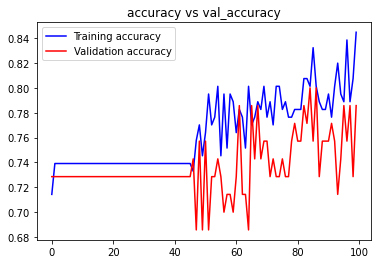

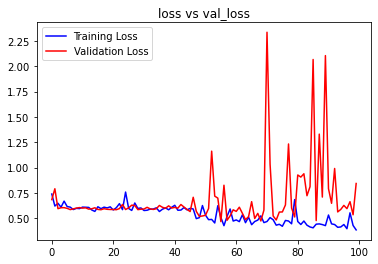

In [9]:
#-----------------------------------------------------------
# Recupero los valores para dibujar las gráficas
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Accuracy vs val_accuracy
#------------------------------------------------
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('accuracy vs val_accuracy')
plt.legend()

plt.figure()

#------------------------------------------------
# Loss vs val_loss
#------------------------------------------------
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('loss vs val_loss')
plt.legend()

plt.show()

## Función de clasificación

In [10]:
def clasificacion(path):
    img=image.load_img(path, target_size=(150, 150))
  
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
  
    classes = model.predict(images)
  
    if classes[0]>0:
        print("Está viva")
    else:
        print("Está muerta")

# ----------------------------------------------------------------------------------------------------
# Pruebas de clasificación
# ----------------------------------------------------------------------------------------------------

In [11]:
#Directorio que contiene una foto de una gallina, independientemente de su estado, para su clasificación
path='C:/Users/Saul/Desktop/SAUL/INFORMATICA/UBU 4º/2º semestre/TFG/Fotos_Proyecto_Detección_de_Bajas/Prediccion/I_10.jpg'

clasificacion(path)

Está viva
